# Import

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


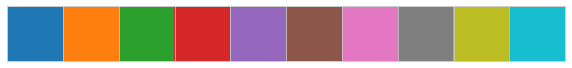

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from scipy.sparse import csr_matrix, hstack
import scipy.sparse
from scipy.stats import probplot
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns 
import gc
import warnings
warnings.filterwarnings('ignore')
import time

color = sns.color_palette()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.palplot(color)

import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

import datetime
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
import xgboost  as xgb
from sklearn.neighbors import KNeighborsRegressor

In [0]:
! pip install pyLDAvis

In [0]:
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
import pyLDAvis.gensim
import gensim
from gensim.matutils  import Sparse2Corpus
from gensim.corpora import Dictionary
from gensim.models import LdaModel

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

PATH = "../content/drive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv(PATH+'train.csv', index_col = 0)

In [0]:
test = pd.read_csv(PATH+'test.csv', index_col = 0)

In [0]:
train_new = pd.read_csv(PATH+'train_new2.csv', index_col = 0)
# image_count_tr = train_new['images_count']
# href_count_tr = train_new['href_count']

h1_count_tr = train_new['h1_count']
h2_count_tr = train_new['h2_count']
h3_count_tr = train_new['h3_count']
min_reads_tr = train_new['min_reads']

del train_new

In [0]:
test_new = pd.read_csv(PATH+'test_new2.csv', index_col = 0)
# image_count_test = test_new['images_count']
# href_count_test = test_new['href_count']

h1_count_test = test_new['h1_count']
h2_count_test = test_new['h2_count']
h3_count_test = test_new['h3_count']
min_reads_test = test_new['min_reads']

del test_new

In [0]:
df_full = pd.read_csv(PATH+'df_full_tmp.csv', index_col= 0) 
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,count_by_author,cnt_by_author_ctg,read_time_min,length_type,author_wo_space,tags_freq_log,topic
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,2,few,4,huge,JasonCohen,0.0,3


In [0]:
# Обратное разделение на train и test
b = 57125 
train = df_full[:b]
test = df_full[b:]
del df_full
gc.collect()

120

In [0]:
train['h1_count'] = h1_count_tr
train['h2_count'] = h2_count_tr
train['h3_count'] = h3_count_tr 
train['min_reads'] = min_reads_tr

In [0]:
test['h1_count'] = h1_count_test
test['h2_count'] = h2_count_test
test['h3_count'] = h3_count_test
test['min_reads'] = min_reads_test

In [0]:
df_full = pd.concat([train,test])
print('df_full shape: ',df_full.shape)

df_full shape:  (91770, 30)


In [0]:
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,count_by_author,cnt_by_author_ctg,read_time_min,length_type,author_wo_space,tags_freq_log,topic,h1_count,h2_count,h3_count,min_reads
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,2,few,4,huge,JasonCohen,0.0,3,1,1,1,4


In [0]:
# Информация по столбцам
pd.DataFrame({'Feature': df_full.columns.tolist(),
              'NaN_count': df_full.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df_full.columns.tolist()).apply(lambda row: df_full[row].nunique()),
              'type': pd.Series(df_full.columns.tolist()).apply(lambda row: df_full[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,content,0,91758,object
1,published,0,91596,object
2,title,0,91138,object
3,author,0,42225,object
4,domain,0,231,object
5,tags,0,84618,object
6,length,0,21158,int64
7,url,0,91743,object
8,dow,0,7,int64
9,year,0,4,int64


In [0]:
df_full['min_reads'].unique()

array([  4,   5,   3,   7,  87,   6,  25,   9,  10,   8,  14,  16,  18,
        11,  13,  17,  15,  12,  26,  21,  44,  27,   2,  23,  36,  19,
        39,  24,  22,  29,  30,  28,  49,  52,  33,  71,  32,   1,  20,
        34,  31,  59, 243,  37,  38,  35,  41,  47, 113,  55, 144,  83,
        53,  40,  74,  43,  45,  42,  48, 188,  86,  64, 122,  85, 206,
        54,  84, 103,  97,  57,  46,  90,  70,  51,  56, 129, 134,  75,
       771,  73, 145,  60, 139,  79, 114,  67,  68, 106,  88,  50,  58,
       272, 130, 108,  61,  66, 111, 223, 208, 141, 181, 101,  96,  63,
       123,  62,  80,  76,  82, 100, 115,  98, 174, 128, 104, 126, 175,
        95, 382])

In [0]:
df_full.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags', 'images_count',
       'href_count', 'domain_top', 'day_type', 'images_cnt_cat',
       'href_cnt_cat', 'count_by_author', 'cnt_by_author_ctg', 'read_time_min',
       'length_type', 'author_wo_space', 'tags_freq_log', 'topic', 'h1_count',
       'h2_count', 'h3_count', 'min_reads'],
      dtype='object')

In [0]:
df_full = df_full.drop(columns= ['cnt_by_author_ctg', 'read_time_min', 'images_cnt_cat', 'href_cnt_cat'])

In [0]:
df_full.columns

Index(['content', 'published', 'title', 'author', 'domain', 'tags', 'length',
       'url', 'dow', 'year', 'month', 'hour', 'number_of_tags', 'images_count',
       'href_count', 'domain_top', 'day_type', 'count_by_author',
       'length_type', 'author_wo_space', 'tags_freq_log', 'topic', 'h1_count',
       'h2_count', 'h3_count', 'min_reads'],
      dtype='object')

In [0]:
df_full.to_csv(PATH+'df_full_tmp_2205.csv')

In [0]:
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,count_by_author,length_type,author_wo_space,tags_freq_log,topic,h1_count,h2_count,h3_count,min_reads
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,2,huge,JasonCohen,0.0,3,1,1,1,4


# Data prepare

In [0]:
# Большая часть выборки - это данные за 2016 и 2017 год, поэтому обрежем выборку по 2015 год
train = train[train.year >= 2015]
# Обновим индексы
train = train.reset_index(drop=True)

In [0]:
# Заменим пропущенные на unknown
train['tags'] = train['tags'].fillna('unknown')
# Заменим пропущенные на unknown
test['tags'] = test['tags'].fillna('unknown')

In [0]:
train['images_count'] = image_count_tr  
train['href_count'] = href_count_tr

test['images_count'] = image_count_test
test['href_count'] = href_count_test

del image_count_test, image_count_tr,  href_count_test, href_count_tr

In [0]:
train.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target,images_count,href_count
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,0.69315,3,23


In [0]:
# Отметка для последующего разделения датасетов
b = train.shape[0]
# удалим target 
y_train_df = train['target']
# Объединяем test и train датасет для обработки категориальных переменных
df_full = pd.concat([train.drop(columns = 'target'),test])
print('df_full shape: ',df_full.shape)

df_full shape:  (91770, 15)


In [0]:
def get_new_features(df):
  # domain
  def domain_get(label):
    if label == 'medium.com':
      res = 'medium' 
    elif label == 'hackernoon.com':
      res = 'hackernoon'
    else: 
      res = 'others'
    return res 
    
  df['domain_top'] = df['domain'].apply(domain_get)
  print('domain_top')
  # day_type
  def get_day_type(day):
    res = ''
    if day == 5 or day == 6:
      res = 'weekend'
    else: 
      res = 'workday'
    return res
    
  df['day_type'] = df['dow'].apply(get_day_type)
  print('day_type')

  # images_cnt_cat
  df['images_cnt_cat']='few'
  df['images_cnt_cat'][df.images_count<7]='few'
  df['images_cnt_cat'][(df.images_count>=7) & (df.images_count<12)]='medium'
  df['images_cnt_cat'][df.images_count>=12]='many'
  print('images_cnt_cat')
  
  # href_cnt_cat
  df['href_cnt_cat']='few'
  df['href_cnt_cat'][df.href_count<20]='few'
  df['href_cnt_cat'][(df.href_count>=20) & (df.href_count<40)]='medium'
  df['href_cnt_cat'][df.href_count>=40]='many'
  print('href_cnt_cat')

  # count_by_author
  df['count_by_author']=df.groupby('author').transform('count')['content']  #count number of posts per author
  print('count_by_author')

  # cnt_by_author_ctg 
    #df_full['cnt_by_author_ctg'] = 'few'
  df_full['cnt_by_author_ctg'][df_full.count_by_author == 1 ] = '1'
  df_full['cnt_by_author_ctg'][(df_full.count_by_author > 1)&(df_full.count_by_author < 4)]='2-3'
  df_full['cnt_by_author_ctg'][(df_full.count_by_author >= 4)&(df_full.count_by_author <= 12)]='4-12'
  df_full['cnt_by_author_ctg'][df_full.count_by_author > 12)]='12'

  df_full['cnt_by_author_ctg'][df_full.count_by_author >= 70]='large'
  print('cnt_by_author_ctg')
  
  # read_time_min
  df_full['read_time_min'] = round(df_full['length']*0.046/60) # в минутах 
  df_full['read_time_min'] =  df_full['read_time_min'].astype(int)
  
  # length_type
  df['length_type']='medium'
  df['length_type'][df.length<800]='short'
  df['length_type'][(df.length>=2500) & (df.length<5000)]='long_read'
  df['length_type'][df.length>=5000]='huge'
  print('length_type')
  
  # Удалим пробелы из ФИ автора, чтобы работать с сочетаниями Ф+И
  df['author_wo_space'] = df['author'].str.replace(' ', '')
  print('author_wo_space')
  return  df

In [0]:
%%time
df_full = get_new_features(df_full)

domain_top
day_type
images_cnt_cat
href_cnt_cat
count_by_author
cnt_by_author_ctg
length_type
author_wo_space
CPU times: user 394 ms, sys: 56 ms, total: 450 ms
Wall time: 463 ms


In [0]:
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,count_by_author,cnt_by_author_ctg,read_time_min,length_type,author_wo_space
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,2,few,4,huge,JasonCohen


In [0]:
# df_full.to_csv(PATH+'df_full_tmp.csv')

In [0]:
df_full_col = pd.read_csv(PATH+'df_full_exm.csv')
df_full_col.head(1)

,Unnamed: 0,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,domain_top,day_type,count_by_author,length_type,author_wo_space,tags_freq,tags_freq_log
0,0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,medium,workday,2,huge,JasonCohen,0,0.0


In [0]:
tag_freq_log = df_full_col['tags_freq_log']
del df_full_col

In [0]:
df_full['tags_freq_log'] = tag_freq_log

In [0]:
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,count_by_author,cnt_by_author_ctg,read_time_min,length_type,author_wo_space,tags_freq_log
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,2,few,4,huge,JasonCohen,0.0


In [0]:
#del tag_freq_log
#df_full.to_csv(PATH+'df_full_tmp2.csv')

In [0]:
df_full = pd.read_csv(PATH+'df_full_tmp2.csv', index_col = 0)
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,count_by_author,cnt_by_author_ctg,read_time_min,length_type,author_wo_space,tags_freq_log
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,2,few,4,huge,JasonCohen,0.0


In [0]:
df_full_col = pd.read_csv(PATH+'df_full_exm_stnd_lda.csv')
df_full_col.head(1)

,Unnamed: 0,count_by_author,tags_freq_log,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,domain_top,day_type,length_type,author_wo_space,tags_freq,topic
0,0,-0.312979,-3.23016,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,medium,workday,huge,JasonCohen,0,3


In [0]:
topic = df_full_col['topic']
del df_full_col

df_full['topic'] =  topic

gc.collect()
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,count_by_author,cnt_by_author_ctg,read_time_min,length_type,author_wo_space,tags_freq_log,topic
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,2,few,4,huge,JasonCohen,0.0,3


In [0]:
#df_full.to_csv(PATH+'df_full_tmp.csv')

In [0]:
df_full.shape

(91770, 26)

#### tags_freq

In [0]:
%%time
cv_tags = CountVectorizer(ngram_range=(1, 1), min_df=5) # ngram_range=(1, 1) - униграмма (последовательность из 1 слова), min_df=5 - не берем слова, частота встречаемости которых меньше 5
tags = cv_tags.fit_transform(df_full.tags.astype('U').values).toarray() 

CPU times: user 1.18 s, sys: 1.94 s, total: 3.13 s
Wall time: 3.15 s


In [0]:
%%time
matrix_freq = tags.sum(axis=0).ravel() # матрица частот тэгов. Ravel() - делает плоский массив (в строку)
tags_freq = np.array([np.array(cv_tags.get_feature_names()), matrix_freq]) # объединяем в 2мерный массив - тэг [0] и его частота [1]

CPU times: user 703 ms, sys: 2.08 ms, total: 705 ms
Wall time: 706 ms


In [0]:
# для аналитики лайков по тэгам 
df_tags = pd.DataFrame()
df_tags['tag'] = tags_freq[0]
df_tags['number_of_posts'] = tags_freq[1]

In [0]:
df_tags['number_of_posts'] = df_tags['number_of_posts'].astype(int)
df_tags['tag'] = df_tags['tag'].astype(str)

In [0]:
def get_num_freq_tags(instr):
  instr = str(instr)
  list_tag = instr.split()
  cnt_freq = 0 
  tmp = []
  # in df_tags нет тэгов, которые встречаются меньше 5 раз 
  for i in list_tag:
      tmp = df_tags[df_tags['tag'] == str.lower(i)]['number_of_posts']
      #print(tmp)
      try:
        tmp_num = int(tmp)
      except: 
        tmp_num = 1 
        
      #print(tmp_num)
      cnt_freq = cnt_freq + tmp_num
      #print(cnt_freq)
  return cnt_freq

In [0]:
%%time
# Применим ко всему датасэту 
df_full['tags_freq'] = df_full['tags'].apply(get_num_freq_tags)

CPU times: user 5min 52s, sys: 528 ms, total: 5min 52s
Wall time: 5min 52s


In [0]:
del cv_tags, tags, matrix_freq, tags_freq

In [0]:
gc.collect()

0

#### Tag Freq log 

In [0]:
df_full['tags_freq_log'] = np.log(df_full['tags_freq'])

#### обработка тэгов тестовой выборки

In [0]:
df_full[df_full['number_of_tags'] == 0]['tags'].unique()

array(['unknown'], dtype=object)

In [0]:
df_full.loc[df_full['tags'] == 'unknown' , 'tags_freq'] = 0
df_full.loc[df_full['tags'] == 'unknown' , 'tags_freq_log'] = 0

In [0]:
df_full[df_full['number_of_tags'] == 0][['tags', 'tags_freq']]

,tags,tags_freq
0,unknown,0
1,unknown,0
2,unknown,0
3,unknown,0
4,unknown,0
...,...,...
34509,unknown,0
34510,unknown,0
34512,unknown,0
34548,unknown,0


### стандартизация

In [0]:
df_full = pd.read_csv(PATH+'df_full_tmp.csv', index_col=0)
df_full.head(1)

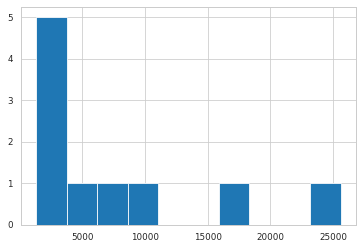

In [0]:
df_full[df_full['count_by_author'] <= 10 ]['count_by_author'].value_counts().hist()

In [0]:
df_full[df_full['count_by_author'] <= 20 ]['count_by_author'].value_counts()

1     25596
2     16032
3     10515
4      7020
5      4865
6      3522
7      2751
8      2376
9      1854
11     1375
10     1360
12     1332
13      936
15      885
14      728
16      640
18      576
17      561
20      500
19      456
Name: count_by_author, dtype: int64

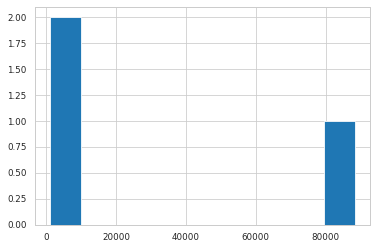

In [0]:
df_full['cnt_by_author_ctg'].value_counts().hist()

In [0]:
# df_full['cnt_by_author_ctg2'] = '1'
# df_full['cnt_by_author_ctg2'][(df_full.count_by_author > 1)&(df_full.count_by_author < 4)]='2-3'
# df_full['cnt_by_author_ctg2'][(df_full.count_by_author >= 4)&(df_full.count_by_author <= 12)]='4-12'
# df_full['cnt_by_author_ctg2'][df_full.count_by_author > 12]='>12'

df_full['cnt_by_author_ctg2'] = '1'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==0]='0'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==1]='1'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==2]='2'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==3]='3'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==4]='4'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==5]='5'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==6]='6'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==7]='7'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==8]='8'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==9]='9'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==10]='10'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==11]='11'
df_full['cnt_by_author_ctg2'][df_full.count_by_author==12]='12'
df_full['cnt_by_author_ctg2'][df_full.count_by_author > 12]='>12'


In [0]:
df_full['cnt_by_author_ctg2'].value_counts()

1      25596
2      16032
>12    13172
3      10515
4       7020
5       4865
6       3522
7       2751
8       2376
9       1854
11      1375
10      1360
12      1332
Name: cnt_by_author_ctg2, dtype: int64

In [0]:
# read_time_min
df_full[df_full['read_time_min'] <= 1000 ]['read_time_min'].value_counts()

5      14699
6      13330
4      11814
7      10437
8       7785
       ...  
95         1
96         1
161        1
146        1
255        1
Name: read_time_min, Length: 133, dtype: int64

In [0]:
df_full['read_time_min_cat']='1'
df_full['read_time_min_cat'][(df_full.read_time_min>=0) & (df_full.read_time_min<4)]='0-3'
df_full['read_time_min_cat'][(df_full.read_time_min>=4) & (df_full.read_time_min<6)]='4-5'
df_full['read_time_min_cat'][(df_full.read_time_min>=6) & (df_full.read_time_min<8)]='6-7'
df_full['read_time_min_cat'][(df_full.read_time_min>=8) & (df_full.read_time_min<10)]='8-9'
df_full['read_time_min_cat'][(df_full.read_time_min>=10) & (df_full.read_time_min<=12)]='10-12'

df_full['read_time_min_cat'][df_full.read_time_min>12]='>12'

In [0]:
df_full['read_time_min_cat'].value_counts()

4-5      26513
6-7      23767
8-9      13167
0-3      10481
10-12     8977
>12       8865
Name: read_time_min_cat, dtype: int64

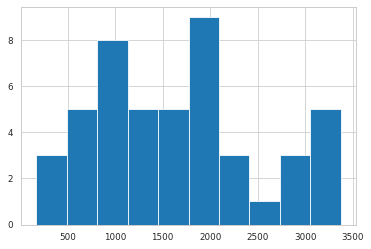

In [0]:
df_full[df_full['href_count'] <= 50 ]['href_count'].value_counts().hist()

In [0]:
df_full[df_full['href_count'] <= 100 ]['href_count'].value_counts()

11     3373
15     3234
19     3105
13     3082
17     3076
       ... 
90       73
98       70
94       70
96       55
100      54
Name: href_count, Length: 97, dtype: int64

In [0]:
 # href_cnt_cat
df_full['href_cnt_cat2']='1'
df_full['href_cnt_cat2'][(df_full.href_count>=0) & (df_full.href_count<10)]='0-9'
df_full['href_cnt_cat2'][(df_full.href_count>=10) & (df_full.href_count<20)]='10-19'
df_full['href_cnt_cat2'][(df_full.href_count>=20) & (df_full.href_count<30)]='20-29'
df_full['href_cnt_cat2'][(df_full.href_count>=30) & (df_full.href_count<40)]='30-39'
df_full['href_cnt_cat2'][(df_full.href_count>=40) & (df_full.href_count<70)]='40-69'
df_full['href_cnt_cat2'][df_full.href_count>=70]='>70'


In [0]:
df_full['href_cnt_cat2'].value_counts()

10-19    25346
20-29    22426
40-69    16718
30-39    15073
>70       6429
0-9       5778
Name: href_cnt_cat2, dtype: int64

In [0]:
#images_count
df_full[df_full['images_count'] <= 1000 ]['images_count'].value_counts()

4      15951
3      11536
5       9894
6       8664
7       7267
       ...  
162        1
99         1
100        1
228        1
156        1
Name: images_count, Length: 172, dtype: int64

In [0]:
 # images_cnt_cat2
df_full['images_cnt_cat2']='1'
df_full['images_cnt_cat2'][df_full.images_count==0]='0'
df_full['images_cnt_cat2'][df_full.images_count==1]='1'
df_full['images_cnt_cat2'][df_full.images_count==2]='2'
df_full['images_cnt_cat2'][df_full.images_count==3]='3'
df_full['images_cnt_cat2'][df_full.images_count==4]='4'
df_full['images_cnt_cat2'][df_full.images_count==5]='5'
df_full['images_cnt_cat2'][df_full.images_count==6]='6'
df_full['images_cnt_cat2'][df_full.images_count==7]='7'
df_full['images_cnt_cat2'][df_full.images_count==8]='8'
df_full['images_cnt_cat2'][df_full.images_count==9]='9'
df_full['images_cnt_cat2'][df_full.images_count==10]='10'
df_full['images_cnt_cat2'][df_full.images_count==11]='11'
df_full['images_cnt_cat2'][df_full.images_count==12]='12'
df_full['images_cnt_cat2'][df_full.images_count==13]='13'
df_full['images_cnt_cat2'][df_full.images_count==14]='14'
df_full['images_cnt_cat2'][df_full.images_count==15]='15'

df_full['images_cnt_cat2'][(df_full.images_count>=11) & (df_full.images_count<17)]='11-16'
df_full['images_cnt_cat2'][df_full.images_count>=17]='>17'

In [0]:
df_full['images_cnt_cat2'].value_counts()

4        15951
11-16    11748
3        11536
5         9894
6         8664
7         7267
>17       7123
8         6381
9         5089
2         4306
10        3811
Name: images_cnt_cat2, dtype: int64

In [0]:
# Обновим индексы (понадобится для стандратизации)
df_full = df_full.reset_index(drop=True)

# стандартизация признаков 'count_by_author', 'tags_freq_log'
numerical_feature = ['count_by_author', 
                     'tags_freq_log',
                     #'images_count',
                     #'href_count',
                     'read_time_min',
                     'length'
                     ] # 'number_of_tags',
scaler=StandardScaler()

# Со стандартизированными числовыми признаками новый датасэт  
df_scaled = pd.DataFrame(scaler.fit_transform(df_full[numerical_feature]), columns = numerical_feature)
df_full = df_full.drop(columns = numerical_feature) # удаляем признаки
df_full = pd.concat([df_scaled, df_full], axis = 1)  # добавляем их уже в стандартизированном формате
del df_scaled

In [0]:
df_full.head(1)

,count_by_author,tags_freq_log,length,content,published,title,author,domain,tags,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,images_cnt_cat,href_cnt_cat,cnt_by_author_ctg,read_time_min,length_type,author_wo_space,topic
0,-0.312979,-2.906573,-0.537849,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,few,medium,few,4,huge,JasonCohen,3


In [0]:
df_full.to_csv(PATH+'df_full_tmp_stnd_lda.csv')

In [0]:
df_full.describe()

,count_by_author,tags_freq_log,images_count,href_count,read_time_min,length,dow,year,month,hour,number_of_tags,topic
count,9.177000e+04,9.177000e+04,9.177000e+04,9.177000e+04,9.177000e+04,9.177000e+04,91770.000000,91770.000000,91770.000000,91770.000000,91770.000000,91770.000000
mean,9.952102e-16,-1.758018e-15,-8.851564e-15,5.802146e-18,4.405061e-15,-1.564862e-18,2.544132,2016.616803,6.203378,13.335327,4.085747,13.685224
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.872355,0.865357,3.714416,6.312602,1.274916,8.361109
min,-3.542303e-01,-2.906573e+00,-6.692708e-01,-7.305010e-01,-1.113300e+00,-1.093748e+00,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000
25%,-3.542303e-01,-3.546906e-01,-4.529858e-01,-4.135334e-01,-3.697572e-01,-4.379898e-01,1.000000,2016.000000,2.000000,9.000000,3.000000,6.000000
50%,-2.717284e-01,2.925486e-01,-2.367009e-01,-1.940944e-01,-2.210486e-01,-1.996983e-01,2.000000,2017.000000,6.000000,14.000000,5.000000,13.000000
75%,-1.067247e-01,7.002772e-01,8.772656e-02,1.472553e-01,2.250771e-01,1.577104e-01,4.000000,2017.000000,10.000000,18.000000,5.000000,21.000000
max,8.968480e+00,1.362407e+00,5.686253e+01,8.180297e+01,6.773876e+01,6.780365e+01,6.000000,2018.000000,12.000000,23.000000,6.000000,29.000000


In [0]:
# Информация по столбцам
pd.DataFrame({'Feature': df_full.columns.tolist(),
              'NaN_count': df_full.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df_full.columns.tolist()).apply(lambda row: df_full[row].nunique()),
              'type': pd.Series(df_full.columns.tolist()).apply(lambda row: df_full[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,count_by_author,0,77,float64
1,tags_freq_log,0,11491,float64
2,images_count,0,172,float64
3,read_time_min,0,133,float64
4,content,0,91758,object
5,published,0,91596,object
6,title,0,91138,object
7,author,0,42225,object
8,domain,0,231,object
9,tags,0,84618,object


### Новый признак: Кол-во ссылок в тексте 



In [0]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

with train data

In [0]:
df_full['url'][1]

'https://medium.com/@gweinger/be-selfish-read-to-your-kids-7a9d373c3faa'

In [0]:
data=pd.read_json(PATH+'train.json', lines=True)

In [0]:
data.head(1)

,_id,_timestamp,_spider,url,domain,published,title,content,author,image_url,tags,link_tags,meta_tags
0,https://medium.com/policy/medium-terms-of-serv...,1.520035e+09,medium,https://medium.com/policy/medium-terms-of-serv...,medium.com,{'$date': '2012-08-13T22:54:53.510Z'},Medium Terms of Service – Medium Policy – Medium,"<div><header class=""container u-maxWidth740""><...","{'name': None, 'url': 'https://medium.com/@Med...",None,[],{'canonical': 'https://medium.com/policy/mediu...,"{'viewport': 'width=device-width, initial-scal..."


In [0]:
def preprocessing(df):

    df = df[['content', 'title', 'published', 'image_url','meta_tags']]

    df.image_url=np.where(df.image_url.isna(), 0, 1)
    
    #df=df.drop('_spider', axis=1)
    #df.author=df.author.apply(lambda x: x.get('url').split('@')[1])
    # df['count_by_author']=df.groupby('author').transform('count')['content']  #count number of posts per author
    # df['count_by_domain']=df.groupby('domain').transform('count')['content'] #count number of posts per domain
    # df['images_count']=df.content.apply(lambda x: x.count('<img'))  #count number of images
    df['h1_count']=df.content.apply(lambda x: x.count('<h1')) #count number of titles
    df['h2_count']=df.content.apply(lambda x: x.count('<h2')) ##count number of titles
    df['h3_count']=df.content.apply(lambda x: x.count('<h3')) #count number of titles
    # df['href_count']=df.content.apply(lambda x: x.count('href')) #count number of links
    # df['content_length']=df['content'].apply(lambda x: len(strip_tags(x).split()))  #count content lenght and split to categories below
    # df['content_length_type']='medium'
    # df['content_length_type'][df.content_length<800]='short'
    # df['content_length_type'][(df.content_length>2500) & (df.content_length<5000)]='long_read'
    # df['content_length_type'][df.content_length>=5000]='huge'
    # df.domain=df.domain.apply(lambda x: ' '.join(x.split('.')))
    df['min_reads']=df.meta_tags.apply(lambda x: int(x.get('twitter:data1').split()[0]))  #get read mins 
    
    #columns=['count','images_count','content_length','content_length_type','min_reads','text','target','image_url']
    return df

In [0]:
data_preproc = preprocessing(data)
data_preproc.head()

,content,title,published,image_url,meta_tags,h1_count,h2_count,h3_count,min_reads
0,"<div><header class=""container u-maxWidth740""><...",Medium Terms of Service – Medium Policy – Medium,{'$date': '2012-08-13T22:54:53.510Z'},0,"{'viewport': 'width=device-width, initial-scal...",1,0,2,5
1,"<div><header class=""container u-maxWidth740""><...",Amendment to Medium Terms of Service Applicabl...,{'$date': '2015-08-03T07:44:50.331Z'},0,"{'viewport': 'width=device-width, initial-scal...",1,0,2,7
2,"<div><header class=""container u-maxWidth740""><...",走入山與海之間：閩東大刀會和兩岸走私 – Yun-Chen Chien（簡韻真） – Medium,{'$date': '2017-02-05T13:08:17.410Z'},1,"{'viewport': 'width=device-width, initial-scal...",1,0,1,2
3,"<div><header class=""container u-maxWidth740""><...",How fast can a camera get? – What comes to min...,{'$date': '2017-05-06T08:16:30.776Z'},1,"{'viewport': 'width=device-width, initial-scal...",1,0,4,3
4,"<div><header class=""container u-maxWidth740""><...",A game for the lonely fox – What comes to mind...,{'$date': '2017-06-04T14:46:25.772Z'},1,"{'viewport': 'width=device-width, initial-scal...",1,0,2,4


In [0]:
def read_json_line(line=None):
    result = None
    j = 0 
    try:        
        result = json.loads(line)
    except Exception as e:      
       # if str(e).split(' ')[-1].replace(')','') != 'object':
          # Find the offending character index:
          idx_to_replace = int(str(e).split(' ')[-1].replace(')',''))   # число    
          # Remove the offending character:
          new_line = list(line)
          # print(len(new_line)) # проверим 
          new_line[idx_to_replace] = ' '
          new_line = ''.join(new_line)     
          return read_json_line(line=new_line)
        #else: pass
    return result

published_list = []
with open(PATH+'train.json', encoding='utf-8') as inp_json_file:
        for line in inp_json_file:
            json_data = read_json_line(line)
            published = json_data['published']['$date']
            published_list.append(published)              

In [0]:
data_preproc['published'] = pd.to_datetime(published_list, format='%Y-%m-%dT%H:%M:%S.%fZ')

In [0]:
data_preproc.sort_values(by='published', inplace=True)
data_preproc['year'] = data_preproc['published'].apply(lambda x: x.year)
# Большая часть выборки - это данные за 2016 и 2017 год, поэтому обрежем выборку по 2015 год
data_preproc = data_preproc[data_preproc.year >= 2015]
# Обновим индексы
data_preproc = data_preproc.reset_index(drop=True)

In [0]:
data_preproc.head()

,content,title,published,image_url,meta_tags,h1_count,h2_count,h3_count,min_reads,year
0,"<div><header class=""container u-maxWidth740""><...",Sic of Myself – Jason Cohen – Medium,2015-01-01 00:25:03.904,1,"{'viewport': 'width=device-width, initial-scal...",1,1,1,4,2015
1,"<div><header class=""container u-maxWidth740""><...",Be Selfish: Keep Reading To Your Kids – Greg W...,2015-01-01 00:58:37.044,0,"{'viewport': 'width=device-width, initial-scal...",1,0,3,5,2015
2,"<div><header class=""container u-maxWidth740""><...",2014 Year in Review – Tracy Chou – Medium,2015-01-01 05:15:27.521,1,"{'viewport': 'width=device-width, initial-scal...",1,1,8,3,2015
3,"<div><header class=""container u-maxWidth740""><...",35 Books that could develop your future in Dig...,2015-01-01 14:33:48.219,0,"{'viewport': 'width=device-width, initial-scal...",1,0,10,3,2015
4,"<div><header class=""container u-maxWidth740""><...",From Movement Moments to Movement Power – phil...,2015-01-01 17:05:51.996,1,"{'viewport': 'width=device-width, initial-scal...",0,0,1,7,2015


In [0]:
len(data_preproc)

57125

In [0]:
data_preproc.columns

Index(['content', 'title', 'published', 'image_url', 'meta_tags', 'h1_count',
       'h2_count', 'h3_count', 'min_reads', 'year'],
      dtype='object')

In [0]:
#images_count_tr = data_preproc['images_count']
#href_count_tr = data_preproc['href_count']

h1_count_tr = data_preproc['h1_count']
h2_count_tr = data_preproc['h2_count']
h3_count_tr = data_preproc['h3_count']

min_reads = data_preproc['min_reads']


In [0]:
del data, data_preproc
gc.collect

<function gc.collect>

In [0]:
#train['images_count'] = images_count_tr
#train['href_count'] = href_count_tr

train['h1_count'] =  h1_count_tr
train['h2_count'] =  h2_count_tr
train['h3_count'] =  h3_count_tr

train['min_reads'] = min_reads 



In [0]:
train.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,target,images_count,href_count,h1_count,h2_count,h3_count,min_reads
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,NaN,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,0.69315,3,23,1,1,1,4


In [0]:
len(train)

57125

In [0]:
train.to_csv(PATH+'train_new2.csv')

In [0]:
del train

with  test data 

In [0]:
data=pd.read_json(PATH+'test.json', lines=True)

In [0]:
data.head(1)

,_id,_timestamp,_spider,url,domain,published,title,content,author,image_url,tags,link_tags,meta_tags
0,https://medium.com/on-mornings/nocturnalmornin...,1.519336e+09,medium,https://medium.com/on-mornings/nocturnalmornin...,medium.com,{'$date': '2018-02-21T17:01:00.928Z'},"For Night Owls, the Day Starts with a Nocturna...","<div><header class=""container u-maxWidth740""><...","{'name': None, 'url': 'https://medium.com/@HIT...",https://cdn-images-1.medium.com/focal/1200/632...,[],{'canonical': 'https://medium.com/on-mornings/...,"{'viewport': 'width=device-width, initial-scal..."


In [0]:
def preprocessing(df):

    df = df[['content', 'title', 'published', 'image_url','meta_tags']]

    df.image_url=np.where(df.image_url.isna(), 0, 1)
    
    #df=df.drop('_spider', axis=1)
    #df.author=df.author.apply(lambda x: x.get('url').split('@')[1])
    # df['count_by_author']=df.groupby('author').transform('count')['content']  #count number of posts per author
    # df['count_by_domain']=df.groupby('domain').transform('count')['content'] #count number of posts per domain
    # df['images_count']=df.content.apply(lambda x: x.count('<img'))  #count number of images
    df['h1_count']=df.content.apply(lambda x: x.count('<h1')) #count number of titles
    df['h2_count']=df.content.apply(lambda x: x.count('<h2')) ##count number of titles
    df['h3_count']=df.content.apply(lambda x: x.count('<h3')) #count number of titles
    # df['href_count']=df.content.apply(lambda x: x.count('href')) #count number of links
    # df['content_length']=df['content'].apply(lambda x: len(strip_tags(x).split()))  #count content lenght and split to categories below
    # df['content_length_type']='medium'
    # df['content_length_type'][df.content_length<800]='short'
    # df['content_length_type'][(df.content_length>2500) & (df.content_length<5000)]='long_read'
    # df['content_length_type'][df.content_length>=5000]='huge'
    # df.domain=df.domain.apply(lambda x: ' '.join(x.split('.')))
    df['min_reads']=df.meta_tags.apply(lambda x: int(x.get('twitter:data1').split()[0]))  #get read mins 
    
    #columns=['count','images_count','content_length','content_length_type','min_reads','text','target','image_url']
    return df

In [0]:
data_preproc = preprocessing(data)
data_preproc.head()

,content,title,published,image_url,meta_tags,h1_count,h2_count,h3_count,min_reads
0,"<div><header class=""container u-maxWidth740""><...","For Night Owls, the Day Starts with a Nocturna...",{'$date': '2018-02-21T17:01:00.928Z'},1,"{'viewport': 'width=device-width, initial-scal...",1,1,9,10
1,"<div><header class=""container u-maxWidth740""><...",Blockchain is Memory – Words That Matter – Medium,{'$date': '2017-12-07T15:56:00.967Z'},1,"{'viewport': 'width=device-width, initial-scal...",0,0,2,5
2,"<div><header class=""container u-maxWidth740""><...",ON MORNINGS Credits – On Mornings – Medium,{'$date': '2018-02-08T17:33:27.816Z'},1,"{'viewport': 'width=device-width, initial-scal...",1,1,11,4
3,"<div><header class=""container u-maxWidth740""><...",Apple HomePod Review: Almost love – Lance Ulan...,{'$date': '2018-02-09T18:04:12.262Z'},1,"{'viewport': 'width=device-width, initial-scal...",1,0,5,10
4,"<div><header class=""container u-maxWidth740""><...",Tips and tricks for Medium writers – 3 min read,{'$date': '2017-10-02T23:08:00.000Z'},0,"{'viewport': 'width=device-width, initial-scal...",1,1,2,4


In [0]:
#images_count_test = data_preproc['images_count']
#href_count_test = data_preproc['href_count']

h1_count_test = data_preproc['h1_count']
h2_count_test = data_preproc['h2_count']
h3_count_test = data_preproc['h3_count']

min_reads = data_preproc['min_reads']


In [0]:
del data, data_preproc
gc.collect

<function gc.collect>

In [0]:
#train['images_count'] = images_count_tr
#train['href_count'] = href_count_tr

test['h1_count'] =  h1_count_tr
test['h2_count'] =  h2_count_tr
test['h3_count'] =  h3_count_tr

test['min_reads'] = min_reads 



In [0]:
test.to_csv(PATH+'test_new2.csv')

In [0]:
test.head()

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,h1_count,h2_count,h3_count,min_reads
0,Member previewHITRECORDhitrecord.org is a new ...,2018-02-21 17:01:00.928,"For Night Owls, the Day Starts with a Nocturna...",HITRECORD,medium.com,MorningRoutines Hitrecord Podcast Night,12500,https://medium.com/on-mornings/nocturnalmornin...,2,2018,2,17,4,11,14,1,1,1,10
1,Member previewMaria Bustillosis a journalist a...,2017-12-07 15:56:00.967,Blockchain is Memory,Maria Bustillos,medium.com,Blockchain Technology History Network WordsTha...,6703,https://medium.com/wordsthatmatter/never-break...,3,2017,12,15,5,6,29,1,0,3,5
2,HITRECORDhitrecord.org is a new kind of online...,2018-02-08 17:33:27.816,ON MORNINGS Credits,HITRECORD,medium.com,Medium Hitrecord OnMornings,6744,https://medium.com/on-mornings/onmorningscredi...,3,2018,2,17,3,4,525,1,1,8,4
3,"Member previewLance UlanoffTech expert, journa...",2018-02-09 18:04:12.262,Apple HomePod Review: Almost love,Lance Ulanoff,medium.com,Apple Homepod Technology Review Audio,12952,https://medium.com/@LanceUlanoff/apple-homepod...,4,2018,2,18,5,13,15,1,0,10,10
4,"MediumEveryone’s stories and ideasOct 2, 2017T...",2017-10-02 23:08:00.000,Tips and tricks for Medium writers,Medium,blog.medium.com,Medium Help Tips,5576,https://blog.medium.com/tips-and-tricks-for-me...,0,2017,10,23,3,3,41,0,0,1,4


In [0]:
del  train, test, h1_count_tr, h2_count_tr, h3_count_tr, h1_count_test, h2_count_test, h3_count_test, min_reads

## LDA 

In [0]:
%%time
train_raw_content = train['content'].values.tolist()
test_raw_content = test['content'].values.tolist()

cv = CountVectorizer(max_features=10000, min_df = 0.1, max_df = 0.8)
sparse_train = cv.fit_transform(train_raw_content)
sparse_test  = cv.transform(test_raw_content)

# CRASH RAM
# cv = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
# sparse_train = cv.fit_transform(train_raw_content) 
# sparse_test = cv.transform(test_raw_content)

CPU times: user 1min 50s, sys: 797 ms, total: 1min 51s
Wall time: 1min 51s


In [0]:
%%time
full_sparse_data =  sparse.vstack([sparse_train, sparse_test])

CPU times: user 59.9 ms, sys: 1.02 ms, total: 60.9 ms
Wall time: 67.2 ms


In [0]:
%%time
#Transform our sparse_data to corpus for gensim
corpus_data_gensim = gensim.matutils.Sparse2Corpus(full_sparse_data, documents_columns=False)

CPU times: user 332 µs, sys: 0 ns, total: 332 µs
Wall time: 346 µs


In [0]:
%%time
#Create dictionary for LDA model
vocabulary_gensim = {}
for key, val in cv.vocabulary_.items():
    vocabulary_gensim[val] = key
    
dict = Dictionary()
dict.merge_with(vocabulary_gensim)

CPU times: user 8.41 ms, sys: 0 ns, total: 8.41 ms
Wall time: 8.58 ms


In [0]:
%%time
# Let's assume, that we can devide our articlуs in 30 different topics.
lda = LdaModel(corpus_data_gensim, num_topics = 30)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

CPU times: user 4min 52s, sys: 3min 19s, total: 8min 12s
Wall time: 4min 19s


In [0]:
%%time
# визуализация - не нужна пока 
data_ =  pyLDAvis.gensim.prepare(lda, corpus_data_gensim, dict)

CPU times: user 3min 37s, sys: 2min 2s, total: 5min 39s
Wall time: 3min 13s


In [0]:
pyLDAvis.display(data_)

In [0]:
%%time
# Transforms a bag of words document to features. 
# It returns the proportion of how much each topic was present in the document.
def document_to_lda_features(lda_model, document):
    topic_importances = lda.get_document_topics(document, minimum_probability=0)
    topic_importances = np.array(topic_importances)
    return topic_importances[:,1]

lda_features = list(map(lambda doc:document_to_lda_features(lda, doc),corpus_data_gensim))

CPU times: user 3min 55s, sys: 2min 46s, total: 6min 42s
Wall time: 3min 25s


In [0]:
%%time
topic_names = ['topic'+str(i) for i in range(1, 31)]
data_pd_lda_features = pd.DataFrame(lda_features, columns = topic_names )
data_pd_lda_features.head()

CPU times: user 853 ms, sys: 115 ms, total: 968 ms
Wall time: 888 ms


In [0]:
data_pd_lda_features.shape

(91770, 30)

In [0]:
data_pd_lda_features.head(1)

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23,topic24,topic25,topic26,topic27,topic28,topic29,topic30
0,0.000098,0.000098,0.000098,0.048868,0.019867,0.000098,0.000098,0.000098,0.000098,0.01801,0.000098,0.000098,0.000098,0.000098,0.033496,0.000098,0.217959,0.301185,0.044452,0.000098,0.000098,0.115972,0.045665,0.000098,0.144599,0.000098,0.000098,0.000098,0.000098,0.008065


In [0]:
data_pd_lda_features.to_csv(PATH+'data_pd_lda_features.csv')

#### Новый признак 'topic'


In [0]:
%%time
# добавим  столбец "topic" - максимум из строк важности топиков (самый важный топик)
data_pd_lda_features['topic'] = data_pd_lda_features.values.argmax(axis=1) 

CPU times: user 20.3 ms, sys: 1.3 ms, total: 21.6 ms
Wall time: 22.4 ms


In [0]:
data_pd_lda_features.head()

NameError: ignored

In [0]:
df_full['topic'] = data_pd_lda_features['topic']
df_full['topic'] = df_full['topic'].astype('object')

In [0]:
# df_full.to_csv(PATH+'df_full_exm_stnd_lda.csv')

In [0]:
df_full = pd.concat([df_full, data_pd_lda_features], axis = 1)
print(df_full.shape)
#del df_full_tmp               

(91770, 58)


In [0]:
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,count_by_author,length_type,author_wo_space,tags_freq_log,topic,h1_count,h2_count,h3_count,min_reads,cnt_by_author_cat,min_reads_cat,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23,topic24,topic25,topic26,topic27,topic28,topic29,topic30
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,2,huge,JasonCohen,0.0,3,1,1,1,4,2,4-5,0.000098,0.000098,0.000098,0.048868,0.019867,0.000098,0.000098,0.000098,0.000098,0.01801,0.000098,0.000098,0.000098,0.000098,0.033496,0.000098,0.217959,0.301185,0.044452,0.000098,0.000098,0.115972,0.045665,0.000098,0.144599,0.000098,0.000098,0.000098,0.000098,0.008065


In [0]:
# поделим на train и test
b = 57125 
train = df_full[:b]
test = df_full[b:]
del df_full

In [0]:
print('TRAIN feats: {}'.format(train.shape))
print('TEST feats: {}'.format(test.shape))

TRAIN feats: (57125, 58)
TEST feats: (34645, 58)


In [0]:
train.head(1)

,count_by_author,tags_freq_log,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,domain_top,day_type,length_type,author_wo_space,tags_freq,topic
0,-0.312979,-3.23016,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,medium,workday,huge,JasonCohen,0,3


#если слетело

In [0]:
# df_full = pd.read_csv(PATH+'df_full_tmp.csv', index_col= 0) 
# df_full.head(1)

In [0]:
# df_full = pd.read_csv(PATH+'df_full_tmp_stnd_lda.csv', index_col= 0) # 21.05 df_full_tmp_stnd_lda 
# df_full.head(1)

In [3]:
df_full = pd.read_csv(PATH+'df_full_tmp_2205.csv', index_col= 0) 
# Обновим индексы (понадобится для стандратизации)
df_full = df_full.reset_index(drop=True)
df_full.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,count_by_author,length_type,author_wo_space,tags_freq_log,topic,h1_count,h2_count,h3_count,min_reads
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,2,huge,JasonCohen,0.0,3,1,1,1,4


In [0]:
def get_cnt_labels_cat(df): 
    col = 'cnt_by_author_cat'
    df[col] = '1'
    df[col][df.count_by_author==0]='0'
    df[col][df.count_by_author==1]='1'
    df[col][df.count_by_author==2]='2'
    df[col][df.count_by_author==3]='3'
    df[col][df.count_by_author==4]='4'
    df[col][df.count_by_author==5]='5'
    df[col][df.count_by_author==6]='6'
    df[col][df.count_by_author==7]='7'
    df[col][df.count_by_author==8]='8'
    df[col][df.count_by_author==9]='9'
    df[col][df.count_by_author==10]='10'
    df[col][df.count_by_author==11]='11'
    df[col][df.count_by_author==12]='12'
    df[col][df.count_by_author > 12]='>12'
    
    col = 'min_reads_cat'
    df[col]='1'
    df[col][(df.min_reads>=0) & (df.min_reads<4)]='0-3'
    df[col][(df.min_reads>=4) & (df.min_reads<6)]='4-5'
    df[col][(df.min_reads>=6) & (df.min_reads<8)]='6-7'
    df[col][(df.min_reads>=8) & (df.min_reads<10)]='8-9'
    df[col][(df.min_reads>=10) & (df.min_reads<=12)]='10-12'
    df[col][df.min_reads>12]='>12'

    # col = 'length_type'
    # df[col]='0'
    # df[col][df.length<6000]='<6000'
    # df[col][(df.length>=6000) & (df.length<10000)]='6000-9999'
    # df[col][(df.length>=10000) & (df.length<20000)]='10000-19999'
    # df[col][df.length>=20000]='>20000'
    
    col = 'h2_count_cat'
    df[col] = '0'
    df[col][df['h2_count']>0] = '>0'

    col = 'h3_count_cat'
    df[col] = '0'
    df[col][df['h3_count']== 1] = '1'
    df[col][df['h3_count']== 2] = '2'
    df[col][df['h3_count']>= 3] = '>3'
    
    df = df.drop(columns='h1_count')
    
    return df

In [0]:
df_full = get_cnt_labels_cat(df_full)

In [0]:
# data_pd_lda_features = pd.read_csv(PATH+'data_pd_lda_features.csv', index_col = 0)
# df_full = pd.concat([df_full, data_pd_lda_features], axis = 1)
# print(df_full.shape)
# #del df_full_tmp  

In [0]:
# def get_std_data(df): 
#     # Обновим индексы (понадобится для стандратизации)
#     df = df.reset_index(drop=True)

#     # стандартизация признаков 'count_by_author', 'tags_freq_log'
#     numerical_feature = ['count_by_author', 
#                         #'tags_freq_log',
#                         #'images_count',
#                         #'href_count',
#                         'min_reads',
#                         'length', 
#                         'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7',
#                         'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13',
#                         'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19',
#                         'topic20', 'topic21', 'topic22', 'topic23', 'topic24', 'topic25',
#                         'topic26', 'topic27', 'topic28', 'topic29', 'topic30'
#                         ] # 'number_of_tags',
#     scaler=StandardScaler()

#     # Со стандартизированными числовыми признаками новый датасэт  
#     df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_feature]), columns = numerical_feature)
#     df = df.drop(columns = numerical_feature) # удаляем признаки
#     df = pd.concat([df_scaled, df], axis = 1)  # добавляем их уже в стандартизированном формате
#     del df_scaled
#     return df 

In [0]:
def get_powered_data(df):
    # Обновим индексы (понадобится для стандратизации)
    df = df.reset_index(drop=True)

    numerical_feature = ['min_reads',
                        'length',
                        'count_by_author', 
                        'images_count',
                        'href_count',
                        'h2_count', 'h3_count'
                        ] 
    # новый датасэт  
    df_powered = pd.DataFrame(PowerTransformer(standardize=True).fit_transform(df[numerical_feature].values), columns = numerical_feature)
    df = df.drop(columns = numerical_feature) # удаляем признаки
    df = pd.concat([df_powered, df], axis = 1)  # добавляем их уже в стандартизированном формате
    del df_powered
    return df


In [0]:
# Обратное разделение на train и test
b = 57125 
train = df_full[:b]
#test = df_full[b:]

# target and train 
y_train_df = pd.read_csv(PATH+'y_train_df_exm.csv', index_col= 0)
y_train_df = y_train_df.values 
y_train_df = y_train_df.reshape(y_train_df.shape[0],)

train['target'] = y_train_df

#обрезаем train по min_reads 
train = train[train['min_reads'] <= 80]
#train = train[train['length'] <= 90000]
y_train_df = train['target']
#y_train_df = np.log1p(train['target'] ) # ard 240520

# # ard 240520: добавим targetlog как признак 
# ridge_pred_target_log_train = pd.read_csv(PATH+'ridge_pred_target_log_train.csv')
# ridge_pred_target_log_test = pd.read_csv(PATH+'ridge_pred_target_log_test.csv')

# train['target_log'] = ridge_pred_target_log_train #np.log1p(train['target']) 

#train = train.drop(columns='target')

# Обновим индексы (понадобится для стандратизации)
train = train.reset_index(drop=True)


In [0]:
train.head(1)

,content,published,title,author,domain,tags,length,url,dow,year,month,hour,number_of_tags,images_count,href_count,domain_top,day_type,count_by_author,length_type,author_wo_space,tags_freq_log,topic,h2_count,h3_count,min_reads,cnt_by_author_cat,min_reads_cat,h2_count_cat,h3_count_cat,target
0,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,5053,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,3,23,medium,workday,2,huge,JasonCohen,0.0,3,1,1,4,2,4-5,>0,1,0.69315


In [0]:
train.shape

(57088, 30)

## Feature selection

In [0]:
# train = get_powered_data(train) - пока не будем 

In [0]:
train.drop(['content', 'title', 'author','author_wo_space', 'tags', 'published', 'url', 'domain', 
           'tags_freq_log',
           'topic'
            ], axis=1, inplace=True)

In [0]:
%%time
list_to_dums = ['number_of_tags','dow', 'month', 'hour', 'domain_top', 'year', 'day_type', 'length_type', 
                'h2_count_cat',
                'h3_count_cat',
                'cnt_by_author_cat',
                'min_reads_cat'
                ] 
dummies = pd.get_dummies(train, columns = list_to_dums, prefix=list_to_dums, sparse=False)
train = dummies.copy()
del dummies

CPU times: user 62.8 ms, sys: 1.86 ms, total: 64.7 ms
Wall time: 64.8 ms


In [0]:
train.head(1)

,length,images_count,href_count,count_by_author,h2_count,h3_count,min_reads,target,number_of_tags_0,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_20,hour_21,hour_22,hour_23,domain_top_hackernoon,domain_top_medium,domain_top_others,year_2015,year_2016,year_2017,day_type_weekend,day_type_workday,length_type_huge,length_type_long_read,length_type_medium,length_type_short,h2_count_cat_0,h2_count_cat_>0,h3_count_cat_1,h3_count_cat_2,h3_count_cat_>3,cnt_by_author_cat_1,cnt_by_author_cat_10,cnt_by_author_cat_11,cnt_by_author_cat_12,cnt_by_author_cat_2,cnt_by_author_cat_3,cnt_by_author_cat_4,cnt_by_author_cat_5,cnt_by_author_cat_6,cnt_by_author_cat_7,cnt_by_author_cat_8,cnt_by_author_cat_9,cnt_by_author_cat_>12,min_reads_cat_0-3,min_reads_cat_10-12,min_reads_cat_4-5,min_reads_cat_6-7,min_reads_cat_8-9,min_reads_cat_>12
0,5053,3,23,2,1,1,4,0.69315,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
train.columns

Index(['length', 'images_count', 'href_count', 'count_by_author', 'h2_count',
       'h3_count', 'min_reads', 'target', 'number_of_tags_0',
       'number_of_tags_1', 'number_of_tags_2', 'number_of_tags_3',
       'number_of_tags_4', 'number_of_tags_5', 'number_of_tags_6', 'dow_0',
       'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'domain_top_hackernoon',
       'domain_top_medium', 'domain_top_others', 'year_2015', 'year_2016',
       'year_2017', 'day_type_weekend', 'day_type_workday', 'length_type_huge',
       'length_type_long_read', 'length_type_

In [0]:
X = train.drop(columns ='target', axis=1)
y = train.target
feature_name = X.columns.tolist()

### filter

#### pearson corr

In [0]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-40:]].columns.tolist() # 40 фичей возьмем
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [0]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

40 selected features


#### Chi_2 (исп-ся при задаче классификации)

In [0]:
def get_MinMaxScaler_data(df):
    # Обновим индексы (понадобится для стандратизации)
    df = df.reset_index(drop=True)

    numerical_feature = ['min_reads',
                        'length',
                        'count_by_author', 
                        'images_count',
                        'href_count',
                        'h2_count', 'h3_count'
                        ] 
    # новый датасэт  
    df_MinMaxScaler = pd.DataFrame(MinMaxScaler().fit_transform(df[numerical_feature].values), columns = numerical_feature)
    df = df.drop(columns = numerical_feature) # удаляем признаки
    df = pd.concat([df_MinMaxScaler, df], axis = 1)  # добавляем их уже в стандартизированном формате
    del df_MinMaxScaler
    return df

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # исп-ся при задаче классификации
from sklearn.preprocessing import MinMaxScaler

X_norm = get_MinMaxScaler_data(X)

y = y.astype('float')
chi_selector = SelectKBest(chi2, k=40) # 40 фичей возьмем 
chi_selector.fit(X_norm, y)

ValueError: ignored

In [0]:
X_norm.head(1)

,min_reads,length,count_by_author,images_count,href_count,h2_count,h3_count,number_of_tags_0,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_20,hour_21,hour_22,hour_23,domain_top_hackernoon,domain_top_medium,domain_top_others,year_2015,year_2016,year_2017,day_type_weekend,day_type_workday,length_type_huge,length_type_long_read,length_type_medium,length_type_short,h2_count_cat_0,h2_count_cat_>0,h3_count_cat_1,h3_count_cat_2,h3_count_cat_>3,cnt_by_author_cat_1,cnt_by_author_cat_10,cnt_by_author_cat_11,cnt_by_author_cat_12,cnt_by_author_cat_2,cnt_by_author_cat_3,cnt_by_author_cat_4,cnt_by_author_cat_5,cnt_by_author_cat_6,cnt_by_author_cat_7,cnt_by_author_cat_8,cnt_by_author_cat_9,cnt_by_author_cat_>12,min_reads_cat_0-3,min_reads_cat_10-12,min_reads_cat_4-5,min_reads_cat_6-7,min_reads_cat_8-9,min_reads_cat_>12
0,0.037975,0.038219,0.004425,0.00188,0.009664,0.016129,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
type(y)

pandas.core.series.Series

In [0]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

NotFittedError: ignored

### RFE

In [0]:
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

X_norm = get_MinMaxScaler_data(X)

rfe_selector = RFE(estimator=Ridge(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 93 features.
Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.
Fitting estimator with 13 features.


RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    n_features_to_select=10, step=10, verbose=5)

In [0]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

10 selected features


In [0]:
rfe_feature

['length',
 'href_count',
 'h2_count',
 'h3_count',
 'min_reads',
 'domain_top_medium',
 'year_2015',
 'length_type_medium',
 'cnt_by_author_cat_1',
 'cnt_by_author_cat_>12']

### Embeded

with Ridge

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(Ridge(), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=None, normalize=False,
                                random_state=None, solver='auto', tol=0.001),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [0]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

40 selected features


with RFR

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [0]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

32 selected features


with LGBM

In [0]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

lgbc=LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                        colsample_bytree=0.2,
                                        importance_type='split',
                                        learning_rate=0.05, max_depth=-1,
                                        min_child_samples=20,
                                        min_child_weight=40,
                                        min_split_gain=0.01, n_estimators=500,
                                        n_jobs=-1, num_leaves=32,
                                        objective=None, random_state=None,
                                        reg_alpha=3, reg_lambda=1, silent=True,
                                        subsample=1.0, subsample_for_bin=200000,
                                        subsample_freq=0),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [0]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

35 selected features


## Data to model 

In [0]:
# Обратное разделение на train и test
b = 57125 
train = df_full[:b]
test = df_full[b:]

# target and train 
y_train_df = pd.read_csv(PATH+'y_train_df_exm.csv', index_col= 0)
y_train_df = y_train_df.values 
y_train_df = y_train_df.reshape(y_train_df.shape[0],)

train['target'] = y_train_df

#обрезаем train по min_reads 
train = train[train['min_reads'] <= 80]
#train = train[train['length'] <= 90000]
y_train_df = train['target']
#y_train_df = np.log1p(train['target'] ) # ard 240520

# # ard 240520: добавим targetlog как признак 
# ridge_pred_target_log_train = pd.read_csv(PATH+'ridge_pred_target_log_train.csv')
# ridge_pred_target_log_test = pd.read_csv(PATH+'ridge_pred_target_log_test.csv')

# train['target_log'] = ridge_pred_target_log_train #np.log1p(train['target']) 

train = train.drop(columns='target')

# Обновим индексы (понадобится для стандратизации)
train = train.reset_index(drop=True)

# # ard 240520: добавим targetlog как признак 
# #train['target_log'] = ridge_pred_target_log_train

# test['target_log'] = ridge_pred_target_log_test

# Powered numerical data
train = get_powered_data(train)
test = get_powered_data(test)

# Отметка для последующего разделения датасетов
b = train.shape[0]

In [0]:
#pd.DataFrame(ridge_pred_target_log_train, columns = ['target_log']).to_csv(PATH+'ridge_pred_target_log_train.csv')
#pd.DataFrame(ridge_pred_target_log_test, columns = ['target_log']).to_csv(PATH+'ridge_pred_target_log_test.csv')

In [0]:
print(train.shape)

(57088, 29)


In [0]:
# y_train_df = pd.read_csv(PATH+'y_train_df_exm.csv', index_col= 0)
# y_train_df = y_train_df.values 
# y_train_df = y_train_df.reshape(y_train_df.shape[0],)

In [0]:
# # Обратное разделение на train и test
# b = 57125 
# train = df_full[:b]
# test = df_full[b:]
del df_full
gc.collect()

0

In [0]:
train.head(1)

,min_reads,length,count_by_author,images_count,href_count,h2_count,h3_count,content,published,title,author,domain,tags,url,dow,year,month,hour,number_of_tags,domain_top,day_type,length_type,author_wo_space,tags_freq_log,topic,cnt_by_author_cat,min_reads_cat,h2_count_cat,h3_count_cat
0,-0.957518,-0.866646,-0.418863,-1.225284,-0.125237,1.740688,-1.292515,Jason CohenFreelance graveyard content creator...,2015-01-01 00:25:03.904,Sic of Myself,Jason Cohen,medium.com,unknown,https://medium.com/@cohenesque/sic-of-myself-7...,3,2015,1,0,0,medium,workday,huge,JasonCohen,0.0,3,2,4-5,>0,1


In [0]:
train['target'].hist()

KeyError: ignored

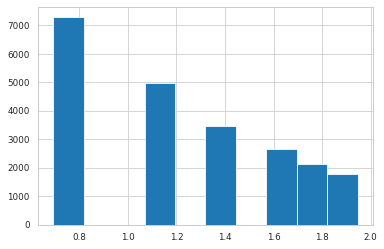

In [0]:
train[train['target'] <= 2]['target'].hist()

In [0]:
# если добавить таргет лог 
# обучить алгоритм предсказывать таргет лог 
# а др алгоритм обучить по таргет лог предсказывать таргет

### coding categor

In [0]:
content_train = train['content'].values.tolist()
#title_train = train['title'].values.tolist()
tags_train = train['tags'].values.tolist()
author_train = train['author_wo_space'].values.tolist()

content_test = test['content'].values.tolist()
#title_test = test['title'].values.tolist()
tags_test = test['tags'].values.tolist()
author_test = test['author_wo_space'].values.tolist()


In [0]:
train.drop(['content', 'title', 'author','author_wo_space', 'tags', 'published', 'url', 'domain', 
            #'length_type',
           'tags_freq_log',
           'topic',
            # 'h1_count', удалил выше в функции 
            #'h2_count',
            #'h3_count'

           #'count_by_author',
 
            #'images_count',
            #'href_count',
            ], axis=1, inplace=True)

In [0]:
test.drop(['content', 'title', 'author','author_wo_space', 'tags', 'published', 'url', 'domain', 
            #'length_type',
           'tags_freq_log',
           'topic',
            #'h1_count', удалил выше в функции 
            #'h2_count',
            #'h3_count'

            #'count_by_author',
  
            #'images_count',
            #'href_count',
           ], axis=1, inplace=True)

In [0]:
#test.drop(['cnt_by_author_ctg'], axis=1, inplace=True)
#train.drop(['cnt_by_author_ctg'], axis=1, inplace=True)

In [0]:
train.columns

Index(['min_reads', 'length', 'count_by_author', 'images_count', 'href_count',
       'h2_count', 'h3_count', 'dow', 'year', 'month', 'hour',
       'number_of_tags', 'domain_top', 'day_type', 'length_type',
       'cnt_by_author_cat', 'min_reads_cat', 'h2_count_cat', 'h3_count_cat'],
      dtype='object')

In [0]:
test.columns

Index(['min_reads', 'length', 'count_by_author', 'images_count', 'href_count',
       'h2_count', 'h3_count', 'dow', 'year', 'month', 'hour',
       'number_of_tags', 'domain_top', 'day_type', 'length_type',
       'cnt_by_author_cat', 'min_reads_cat', 'h2_count_cat', 'h3_count_cat'],
      dtype='object')

In [0]:
%%time
idx_split = len(train)
df_full = pd.concat([train, test])

list_to_dums = ['number_of_tags','dow', 'month', 'hour', 'domain_top', 'year', 'day_type', 'length_type', 
                #'topic',
                #'images_count', 
                #'href_count',
                #'h1_count', удалил выше в функции 
                #'h2_count',
                'h2_count_cat',
                #'h3_count',
                'h3_count_cat',
                #'min_reads'
                'cnt_by_author_cat',
                'min_reads_cat'
                ] 
dummies = pd.get_dummies(df_full, columns = list_to_dums, prefix=list_to_dums, sparse=False)

CPU times: user 118 ms, sys: 1.27 ms, total: 119 ms
Wall time: 121 ms


In [0]:
%%time
X_train_feats = dummies.iloc[:idx_split, :]
X_test_feats = dummies.iloc[idx_split:, :]

CPU times: user 8.3 ms, sys: 921 µs, total: 9.22 ms
Wall time: 10.5 ms


In [0]:
print('TRAIN feats: {}'.format(X_train_feats.shape))
print('TEST feats: {}'.format(X_test_feats.shape))
del dummies, df_full
gc.collect()

TRAIN feats: (57088, 94)
TEST feats: (34645, 94)


0

In [0]:
X_train_feats_copy = X_train_feats.copy()

In [0]:
X_train_feats= X_train_feats_copy.copy()

In [0]:
# X_train_feats = X_train_feats[rfe_feature]
#X_train_feats = X_train_feats[embeded_lr_feature]
#X_train_feats = X_train_feats[embeded_rf_feature]
X_train_feats = X_train_feats[embeded_lgb_feature]

In [0]:
X_train_feats.head(1)

,length,images_count,href_count,count_by_author,h2_count,h3_count,min_reads,number_of_tags_0,number_of_tags_3,number_of_tags_4,number_of_tags_5,dow_1,dow_2,dow_3,dow_4,month_1,month_2,month_3,month_6,month_12,hour_16,year_2015,year_2016,year_2017,day_type_weekend,length_type_huge,length_type_long_read,h3_count_cat_1,h3_count_cat_2,h3_count_cat_>3,cnt_by_author_cat_1,cnt_by_author_cat_3,cnt_by_author_cat_>12,min_reads_cat_10-12,min_reads_cat_4-5
0,-0.866646,-1.225284,-0.125237,-0.418863,1.740688,-1.292515,-0.957518,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1


In [0]:
X_test_feats.head(1)

,min_reads,length,count_by_author,images_count,href_count,h2_count,h3_count,number_of_tags_0,number_of_tags_1,number_of_tags_2,number_of_tags_3,number_of_tags_4,number_of_tags_5,number_of_tags_6,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_21,hour_22,hour_23,domain_top_hackernoon,domain_top_medium,domain_top_others,year_2015,year_2016,year_2017,year_2018,day_type_weekend,day_type_workday,length_type_huge,length_type_long_read,length_type_medium,length_type_short,h2_count_cat_0,h2_count_cat_>0,h3_count_cat_1,h3_count_cat_2,h3_count_cat_>3,cnt_by_author_cat_1,cnt_by_author_cat_10,cnt_by_author_cat_11,cnt_by_author_cat_12,cnt_by_author_cat_2,cnt_by_author_cat_3,cnt_by_author_cat_4,cnt_by_author_cat_5,cnt_by_author_cat_6,cnt_by_author_cat_7,cnt_by_author_cat_8,cnt_by_author_cat_9,cnt_by_author_cat_>12,min_reads_cat_0-3,min_reads_cat_10-12,min_reads_cat_4-5,min_reads_cat_6-7,min_reads_cat_8-9,min_reads_cat_>12
0,1.056028,0.796364,-0.054579,0.988445,-0.986028,1.727337,-1.283114,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#X_train_feats.to_csv(PATH+'X_train_feats.csv')
#X_test_feats.to_csv(PATH+'X_test_feats.csv')

In [0]:
#X_train_feats = pd.read_csv(PATH+'X_train_feats.csv', index_col = 0)
#X_test_feats = pd.read_csv(PATH+'X_test_feats.csv', index_col = 0)

## TF IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
%%time
#cv = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words = 'english')

cv = TfidfVectorizer(ngram_range=(1,2), analyzer='word',
                     max_features=100000, stop_words='english',
                     sublinear_tf=True, strip_accents='unicode')

X_train_tags = cv.fit_transform(tags_train) 
X_test_tags = cv.transform(tags_test)


CPU times: user 1.8 s, sys: 26.9 ms, total: 1.83 s
Wall time: 1.87 s


In [0]:
%%time
#X_train_content = cv.fit_transform(content_train)
#scipy.sparse.save_npz(PATH+'X_train_content_100k.npz', X_train_content)
X_train_content = scipy.sparse.load_npz(PATH+'X_train_content_100k.npz')


CPU times: user 2.82 s, sys: 159 ms, total: 2.98 s
Wall time: 7.6 s


In [0]:
%%time
#X_test_content = cv.transform(content_test)
#scipy.sparse.save_npz(PATH+'X_test_content_100k.npz', X_test_content)
X_test_content = scipy.sparse.load_npz(PATH+'X_test_content_100k.npz')

CPU times: user 1.67 s, sys: 144 ms, total: 1.81 s
Wall time: 3.4 s


In [0]:
%%time
#X_train_title = cv.fit_transform(title_train)
#X_test_title = cv.transform(title_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [0]:
Cvt = CountVectorizer() # max_features=1000 попробуе убрать max_features

X_train_author = Cvt.fit_transform(author_train)
X_test_author = Cvt.transform(author_test)

In [0]:
X_train_content.shape

(57088, 100000)

In [0]:
X_train_tags.shape

(57088, 100000)

In [0]:
#X_train_title.shape

In [0]:
X_train_tags.shape

(57088, 100000)

In [0]:
X_train_author.shape

(57088, 30739)

In [0]:
X_train_feats.describe(include='object')

ValueError: ignored

In [0]:
# scipy.sparse.save_npz(PATH+'X_train_sparse.npz', X_train_sparse)
# scipy.sparse.save_npz(PATH+'X_test_sparse.npz', X_test_sparse)

## Data to sparse

In [0]:
%%time
print('TRAIN content: {}, tags: {}, authors: {}'.format(X_train_content.shape, X_train_tags.shape, X_train_author.shape))#, X_train_title.shape)) #, title: {}
print('TEST content: {}, tags: {}, authors: {}'.format(X_test_content.shape, X_test_tags.shape, X_test_author.shape))#, X_test_title.shape))# , title: {}
del content_train, content_test,  tags_train, tags_test, author_train, author_test # title_train, title_test,
gc.collect()

TRAIN content: (57088, 100000), tags: (57088, 100000), authors: (57088, 30739)
TEST content: (34645, 100000), tags: (34645, 100000), authors: (34645, 30739)
CPU times: user 2.48 s, sys: 6.97 ms, total: 2.49 s
Wall time: 2.48 s


In [0]:
del train, test

In [0]:

%%time
X_train_sparse = csr_matrix(hstack([X_train_content, X_train_tags, X_train_author, X_train_feats.values]))  # X_train_title,

X_test_sparse = csr_matrix(hstack([X_test_content, X_test_tags, X_test_author, X_test_feats.values])) #X_test_title,

CPU times: user 4.29 s, sys: 326 ms, total: 4.62 s
Wall time: 4.63 s


In [0]:
# сохраним матрицу
#import scipy.sparse
#scipy.sparse.save_npz(PATH+'X_train_sparse_NEW.npz', X_train_sparse)
#scipy.sparse.save_npz(PATH+'X_test_sparse_NEW.npz', X_test_sparse)
#X_test_sparse = scipy.sparse.load_npz(PATH+'X_test_sparse_NEW.npz')
#X_train_sparse = scipy.sparse.load_npz(PATH+'X_train_sparse_NEW.npz')

In [0]:
print(X_train_sparse.shape, X_test_sparse.shape)

X_train, X_holdout, y_train, y_holdout = train_test_split(X_train_sparse, y_train_df, test_size=0.3,random_state=17)

(57088, 230774) (34645, 230833)


In [0]:

gc.collect()

120

# Рез-т

In [0]:
def write_submission_file(prediction, path_to_sample=PATH+'sample_submission.csv'):
    submission = pd.read_csv(path_to_sample, index_col='id')
    submission['log_recommends'] = prediction
    submission.to_csv('submission.csv')

In [0]:
%%time
ridge = Ridge(random_state=17)                          
ridge.fit(X_train, y_train)

CPU times: user 59 s, sys: 25 s, total: 1min 24s
Wall time: 55.1 s


In [0]:
# 0.979 (25052020)

# 0.986 RFE Ridge 

# 0.98  embeded_lr_feature

# 0.98  embeded_rf_feature

# 0.982 embeded_lgb_feature

ridge_pred = ridge.predict(X_holdout)
mean_absolute_error(y_holdout, ridge_pred)

0.9817220342410898

In [0]:
ridge_pred = ridge.predict(X_test_sparse)    

In [0]:
mean_test_target = 4.33328 ## среднее значение тестовых таргетов

In [0]:
mix_test_pred_modif = ridge_pred + mean_test_target - y_train_df.mean() ##все таргеты обучения

In [0]:
write_submission_file(mix_test_pred_modif)

In [0]:
# ridge_pred_target_log_train = ridge.predict(X_train_sparse) 
# ridge_pred_target_log_test = ridge.predict(X_test_sparse)   

In [0]:
write_submission_file(lgb_test_pred)

In [0]:
%%time
lgbm = LGBMRegressor(objective= 'fair' ,random_state=17)           
lgbm.fit(X_train, y_train)

CPU times: user 1min 18s, sys: 607 ms, total: 1min 19s
Wall time: 42.6 s


In [0]:
# 0.999 with label target_log
lgbm_pred = lgbm.predict(X_holdout)
mean_absolute_error(y_holdout, lgbm.predict(X_holdout))

1.1633343287483764

In [0]:
lgbm_pred = lgbm.predict(X_test_sparse)

In [0]:
write_submission_file(lgbm_pred)

In [0]:
gc.collect()

0

In [0]:
ridge_pred_tr = ridge.predict(X_train) 
lgbm_pred_tr = lgbm.predict(X_train)

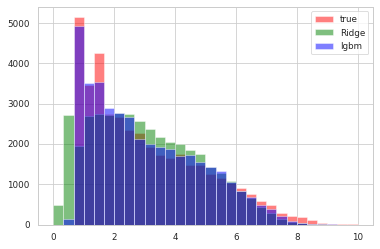

In [0]:
plt.hist(y_train, bins=30, alpha=.5, color='red', label='true', range=(0,10));
plt.hist(ridge_pred_tr, bins=30, alpha=.5, color='green', label='Ridge', range=(0,10));
plt.hist(lgbm_pred_tr, bins=30, alpha=.5, color='blue', label='lgbm', range=(0,10));
#plt.hist(lgbm_pred, bins=30, alpha=.5, color='yellow', label='lgbm', range=(0,10));
plt.legend();

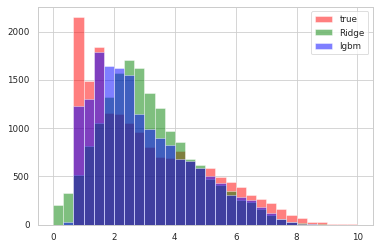

In [0]:
plt.hist(y_holdout, bins=30, alpha=.5, color='red', label='true', range=(0,10));
plt.hist(ridge_pred, bins=30, alpha=.5, color='green', label='Ridge', range=(0,10));
plt.hist(lgbm_pred, bins=30, alpha=.5, color='blue', label='lgbm', range=(0,10));
#plt.hist(lgbm_pred, bins=30, alpha=.5, color='yellow', label='lgbm', range=(0,10));
plt.legend();

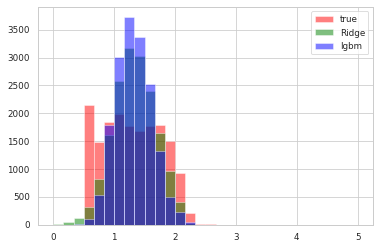

In [0]:
plt.hist(np.log1p(y_holdout), bins=30, alpha=.5, color='red', label='true', range=(0,5));
plt.hist(np.log1p(ridge_pred), bins=30, alpha=.5, color='green', label='Ridge', range=(0,5));
#plt.hist(np.log1p(lgbm_pred), bins=30, alpha=.5, color='blue', label='lgbm', range=(0,5));
#plt.hist(lgbm_pred, bins=30, alpha=.5, color='yellow', label='lgbm', range=(0,10));
plt.legend();

In [0]:
ridge_test_pred = ridge.predict(X_test_sparse)  
lgb_test_pred = lgbm.predict(X_test_sparse)

In [0]:
mix_pred = .3 * lgb_test_pred + .7 * ridge_test_pred

In [0]:
mean_test_target = 4.33328 ## среднее значение тестовых таргетов

In [0]:
mix_test_pred_modif = mix_pred + mean_test_target - y_train_df.mean() ##все таргеты обучения

In [0]:
write_submission_file(mix_test_pred_modif)

In [0]:
def get_right_pred(model_pred, y):
  med_test = np.mean(y) # median
  k = np.arange(0,50,0.0001)
  med_pred = np.mean(model_pred) # median
  min_dif_pred = 1000000000
  model_pred_res = model_pred.copy()
  res_coef = 0 
  for i in k:
    med_tmp = np.mean(model_pred*i) # median
    if abs(med_tmp-med_test) < min_dif_pred: 
      min_dif_pred = abs(med_tmp-med_test)
      #model_pred_res =  model_pred*i
      res_coef = i 
  return res_coef
# попробовать также со средним

In [0]:
pred_tr = ridge.predict(X_train) * get_right_pred(ridge.predict(X_train), y_train) 
pred_hd = ridge.predict(X_holdout) * get_right_pred(ridge.predict(X_holdout), y_holdout) 

In [0]:
ridge_pred_tr = ridge.predict(X_train)
ridge_pred_hd = ridge.predict(X_holdout)

In [0]:
mean_absolute_error(y_train, pred_tr)

0.9603988617245381

In [0]:
mean_absolute_error(y_holdout, pred_hd)

1.188285688605629

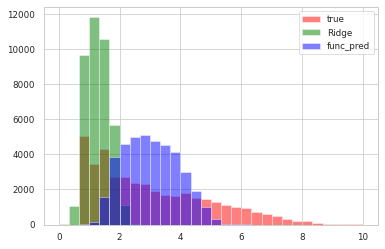

In [0]:
plt.hist(y_train, bins=30, alpha=.5, color='red', label='true', range=(0,10));
plt.hist(ridge_pred_tr, bins=30, alpha=.5, color='green', label='Ridge', range=(0,10));
plt.hist(pred_tr, bins=30, alpha=.5, color='blue', label='func_pred', range=(0,10));
#plt.hist(lgbm_pred, bins=30, alpha=.5, color='yellow', label='lgbm', range=(0,10));
plt.legend();

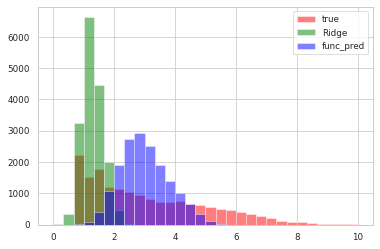

In [0]:
plt.hist(y_holdout, bins=30, alpha=.5, color='red', label='true', range=(0,10));
plt.hist(ridge_pred_hd, bins=30, alpha=.5, color='green', label='Ridge', range=(0,10));
plt.hist(pred_hd, bins=30, alpha=.5, color='blue', label='func_pred', range=(0,10));
#plt.hist(lgbm_pred, bins=30, alpha=.5, color='yellow', label='lgbm', range=(0,10));
plt.legend();

In [0]:
def get_right_pred_test(model_pred, mean_y ):
  k = np.arange(0,5,0.0001)
  med_pred = np.mean(model_pred) # median
  min_dif_pred = 1000000000
  res_coef = 0 
  for i in k:
    med_tmp = np.mean(model_pred*i) # median
    if abs(med_tmp-mean_y) < min_dif_pred: 
      min_dif_pred = abs(med_tmp-mean_y)
      #model_pred_res =  model_pred*i
      
      res_coef = i 
  return res_coef

In [0]:
%%time
mean_y = 4.33328
model_pred = ridge.predict(X_test_sparse)
pred = model_pred * get_right_pred_test(model_pred, mean_y)

CPU times: user 3.28 s, sys: 125 ms, total: 3.4 s
Wall time: 3.41 s


In [0]:
write_submission_file(pred)

In [0]:
get_right_pred_test(model_pred, mean_y)

1.3963

In [0]:
%%time
mean_y = np.mean(y_holdout) #4.33328
model_pred = ridge.predict(X_holdout)
pred = model_pred * get_right_pred_test(model_pred, mean_y)


CPU times: user 1.1 s, sys: 1.1 ms, total: 1.1 s
Wall time: 1.11 s


In [0]:
mean_absolute_error(y_holdout, pred)

1.0259809190650313

In [0]:
catboost !! и хакингом стекать

## Hacking

In [0]:
%%time
ridge.fit(X_train, np.log1p(y_train))
ridge_pred = np.expm1(ridge.predict(X_holdout))

CPU times: user 9.58 s, sys: 6.67 s, total: 16.2 s
Wall time: 8.34 s


In [0]:
%%time
lgb_x_train = lgb.Dataset(X_train.astype(np.float32), label=np.log1p(y_train))

CPU times: user 79.9 ms, sys: 70 ms, total: 150 ms
Wall time: 77.4 ms


In [0]:
%%time
lgb_x_holdout = lgb.Dataset(X_holdout.astype(np.float32),  label=np.log1p(y_holdout))

CPU times: user 21.7 ms, sys: 980 µs, total: 22.7 ms
Wall time: 23 ms


In [0]:
param = {'num_leaves': 255, 
         'objective': 'mean_absolute_error',
         'metric': 'mae'}

In [0]:
%%time
num_round = 100
bst_lgb = lgb.train(param, lgb_x_train, num_round, valid_sets=[lgb_x_holdout], early_stopping_rounds=20)

[1]	valid_0's l1: 0.402735
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l1: 0.392846
[3]	valid_0's l1: 0.384325
[4]	valid_0's l1: 0.376734
[5]	valid_0's l1: 0.370257
[6]	valid_0's l1: 0.364045
[7]	valid_0's l1: 0.35872
[8]	valid_0's l1: 0.354259
[9]	valid_0's l1: 0.350165
[10]	valid_0's l1: 0.346289
[11]	valid_0's l1: 0.34318
[12]	valid_0's l1: 0.34036
[13]	valid_0's l1: 0.337757
[14]	valid_0's l1: 0.335619
[15]	valid_0's l1: 0.333441
[16]	valid_0's l1: 0.331727
[17]	valid_0's l1: 0.330056
[18]	valid_0's l1: 0.328306
[19]	valid_0's l1: 0.327166
[20]	valid_0's l1: 0.325856
[21]	valid_0's l1: 0.324858
[22]	valid_0's l1: 0.323808
[23]	valid_0's l1: 0.322967
[24]	valid_0's l1: 0.322131
[25]	valid_0's l1: 0.321271
[26]	valid_0's l1: 0.320581
[27]	valid_0's l1: 0.319855
[28]	valid_0's l1: 0.319051
[29]	valid_0's l1: 0.318511
[30]	valid_0's l1: 0.318058
[31]	valid_0's l1: 0.317689
[32]	valid_0's l1: 0.317335
[33]	valid_0's l1: 0.316976
[34]	valid_0's l1: 0.31653

In [0]:
lgb_pred = np.expm1(bst_lgb.predict(X_holdout.astype(np.float32), num_iteration=bst_lgb.best_iteration))

In [0]:
%%time
#catboost = CatBoostRegressor(random_state=17)
#catboost.fit(X_train, np.log1p(y_train))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [0]:
#catboost_pred = np.expm1(catboost.predict(X_holdout))

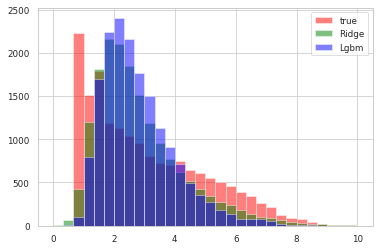

In [0]:
plt.hist(y_holdout, bins=30, alpha=.5, color='red', label='true', range=(0,10));
plt.hist(ridge_pred, bins=30, alpha=.5, color='green', label='Ridge', range=(0,10));
plt.hist(lgb_pred, bins=30, alpha=.5, color='blue', label='Lgbm', range=(0,10));
#plt.hist(catboost_pred, bins=30, alpha=.5, color='yellow', label='Catboost', range=(0,10));
plt.legend();

In [0]:
# было 1.0209
ridge_valid_mae = mean_absolute_error(y_holdout, ridge_pred)
ridge_valid_mae

1.0318822933795457

In [0]:
# было: 1.179
lgb_valid_mae = mean_absolute_error(y_holdout, lgb_pred)
lgb_valid_mae

NameError: ignored

In [0]:
#cb_valid_mae = mean_absolute_error(y_holdout, catboost_pred)
#cb_valid_mae

In [0]:
попробовать стэкинг на логарифме от таргета

### simple blending

In [0]:
mean_absolute_error(y_holdout, .4 * lgb_pred + .6 * ridge_pred)

1.032759402264701

In [0]:
mae_min = 10000
for i in range(1, 10):
  i = i/10
  for j in range(1, 10):
    j = j/10
    mae = mean_absolute_error(tmp, i * lgb_pred + j * tmp_rdg)
    if mae < mae_min: 
      mae_min = mae
      print(mae_min)
      print('i=', i )
      print('j=', j )

for t in range(1, 10):
  t = t/10
for k in range(1, 10):
    k = k/10
    mae = mean_absolute_error(tmp, k * lgb_pred + t * tmp_rdg)
    if mae < mae_min: 
      mae_min = mae
      print(mae_min)
      print('i=', t )
      print('j=', k )

2.4530663765884384
i= 0.1
j= 0.1
2.1752762673198194
i= 0.1
j= 0.2
1.916320935384901
i= 0.1
j= 0.3
1.6814889179807784
i= 0.1
j= 0.4
1.47283940381064
i= 0.1
j= 0.5
1.2953704471213527
i= 0.1
j= 0.6
1.1570872355430146
i= 0.1
j= 0.7
1.066873555200325
i= 0.1
j= 0.8
1.0321585149039094
i= 0.1
j= 0.9
1.0288982111509495
i= 0.2
j= 0.8


In [0]:
%%time
ridge.fit(X_train, np.log1p(y_train))

ridge_test_pred = np.expm1(ridge.predict(X_test_sparse))

CPU times: user 10.6 s, sys: 7.1 s, total: 17.7 s
Wall time: 9.1 s


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=17, solver='auto', tol=0.001)

In [0]:
lgb_x_train = lgb.Dataset(X_train.astype(np.float32), label=np.log1p(y_train))

In [0]:
%%time
num_round = 60
bst_lgb = lgb.train(param, lgb_x_train, num_round)
lgb_test_pred = np.expm1(bst_lgb.predict(X_test_sparse.astype(np.float32)))

CPU times: user 3min 54s, sys: 365 ms, total: 3min 54s
Wall time: 1min 59s


In [0]:
# 4 6 - in kaggle: 1.45
# 3 7 - in kaggle: 1.45
# 2 8 - in kaggle: 1.45
mix_pred = .3 * lgb_test_pred + .7 * ridge_test_pred

#mix_pred = .3 * catboost_test_pred + .7 * ridge_test_pred

In [0]:
mean_test_target = 4.33328 ## среднее значение тестовых таргетов

In [0]:
mix_test_pred_modif = mix_pred + mean_test_target - y_train_df.mean() ##все таргеты обучения

In [0]:
#mix_test_pred_modif = ridge_test_pred*(mean_test_target/np.mean(ridge_test_pred))

In [0]:
# mix_test_pred_modif = mix_pred + mean_test_target - y_train.mean()

In [0]:
write_submission_file(mix_test_pred_modif)

#Stacking

In [0]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state= 17):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение
            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)  
            

        return self
    


    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

In [0]:
# Отрисовка признаковых пространств 
from sklearn.metrics import roc_auc_score, mean_absolute_error

def run_and_plot(clf, X, y, label):
    # plt.figure(figsize=(6, 5))
    
    a = clf.predict(X)
    
    print (label + ' MAE  = ' + str( mean_absolute_error(np.expm1(y), np.expm1(a) ))) # GПоставвил жксопенту , что корректно МАЕ  выводить по абсолютным значениям


In [0]:
%%time
lgbm = LGBMRegressor(objective= 'fair',random_state=17)                          
lgbm.fit(X_train, np.log1p(y_train))

CPU times: user 1min 36s, sys: 161 ms, total: 1min 36s
Wall time: 50.2 s


In [0]:
run_and_plot(lgbm, X_holdout, np.log1p(y_holdout), 'lgbm')

lgbm MAE  = 1.1576109118528188


In [0]:
%%time
rg0 = Ridge(alpha=0.01, random_state=17)
rg0.fit(X_train, np.log1p(y_train))


CPU times: user 10.5 s, sys: 7.59 s, total: 18.1 s
Wall time: 9.34 s


In [0]:
run_and_plot(rg0, X_holdout, np.log1p(y_holdout), 'ridge-0.01')


ridge-0.01 MAE  = 1.0641048697420414


In [0]:
%%time
rg1 = Ridge(alpha = 1, random_state=17)
rg1.fit(X_train, np.log1p(y_train))
#run_and_plot(rg1, X_holdout, y_holdout, 'ridge-1')


CPU times: user 7.21 s, sys: 5.24 s, total: 12.5 s
Wall time: 6.48 s


In [0]:
run_and_plot(rg1, X_holdout, np.log1p(y_holdout), 'ridge-1')


ridge-1 MAE  = 1.0342283065921252


In [0]:
write_submission_file(np.expm1(rg1.predict(X_test_sparse)))

In [0]:
%%time
rg10 = Ridge(alpha = 10, random_state=17)
rg10.fit(X_train, np.log1p(y_train))
#run_and_plot(rg10, X_holdout, y_holdout, 'ridge-10')

CPU times: user 3.76 s, sys: 2.71 s, total: 6.47 s
Wall time: 3.41 s


In [0]:
run_and_plot(rg10, X_holdout, np.log1p(y_holdout), 'ridge-10')

ridge-10 MAE  = 1.1113761740371029


In [0]:
%%time
rf1 = RandomForestRegressor(n_estimators=100, max_depth=1)
rf1.fit(X_train, np.log1p(y_train))
#run_and_plot(rf1,X_holdout, y_holdout, 'rf-d1')

rf-d1 MAE  = 1.5265782991826307
CPU times: user 2min 35s, sys: 31.4 ms, total: 2min 35s
Wall time: 2min 35s


In [0]:
%%time
rf2 = RandomForestRegressor(n_estimators=100, max_depth=5)
rf2.fit(X_train, np.log1p(y_train))
#run_and_plot(rf2, X_holdout, y_holdout, 'rf-d5')

CPU times: user 11min 25s, sys: 153 ms, total: 11min 25s
Wall time: 11min 26s


In [0]:
run_and_plot(rf2, X_holdout, np.log1p(y_holdout), 'rf-2')

rf-2 MAE  = 1.3316083188400574


In [0]:
%%time
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
run_and_plot(knn, X_holdout, y_holdout, 'knn')

knn MAE  = 1.3610859292799624


In [0]:
%%time
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train, y_train)
run_and_plot(knn, X_holdout, y_holdout, 'knn3')

In [0]:
%%time
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train, y_train)
run_and_plot(knn, X_holdout, y_holdout, 'knn10')

knn10 MAE  = 1.3610859292799624


In [0]:
%%time
gb = GradientBoostingRegressor(random_state=17)
gb.fit(X_train, np.log1p(y_train))


gb MAE  = 0.32675738763840484
CPU times: user 10min 36s, sys: 370 ms, total: 10min 37s
Wall time: 10min 38s


In [0]:
run_and_plot(gb, X_holdout, np.log1p(y_holdout), 'gb')

gb MAE  = 1.2358887063765316


In [0]:
%%time 
xgbr = xgb.XGBRegressor(random_state=17)
xgbr.fit(X_train, np.log1p(y_train))


[10:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgbr MAE  = 0.32679207672624666
CPU times: user 2min 35s, sys: 319 ms, total: 2min 35s
Wall time: 2min 36s


In [0]:
run_and_plot(xgbr, X_holdout, np.log1p(y_holdout), 'xgbr')

xgbr MAE  = 1.2356360025256417


In [0]:
! pip install catboost

     |████████████████████████████████| 64.7MB 178kB/s 


In [0]:
from catboost import Pool, CatBoostRegressor

In [0]:
%%time
catboost = CatBoostRegressor(random_state=17)
catboost.fit(X_train, np.log1p(y_train))
run_and_plot(catboost, X_holdout, np.log1p(y_holdout), 'catboost')

Learning rate set to 0.075256
0:	learn: 0.4755247	total: 853ms	remaining: 14m 11s
1:	learn: 0.4695308	total: 1.49s	remaining: 12m 23s
2:	learn: 0.4648987	total: 2.17s	remaining: 12m 1s
3:	learn: 0.4601070	total: 2.87s	remaining: 11m 54s
4:	learn: 0.4555454	total: 3.54s	remaining: 11m 45s
5:	learn: 0.4518653	total: 4.25s	remaining: 11m 44s
6:	learn: 0.4479818	total: 4.91s	remaining: 11m 36s
7:	learn: 0.4447502	total: 5.57s	remaining: 11m 30s
8:	learn: 0.4419785	total: 6.29s	remaining: 11m 32s
9:	learn: 0.4390033	total: 6.95s	remaining: 11m 27s
10:	learn: 0.4367143	total: 7.64s	remaining: 11m 27s
11:	learn: 0.4345703	total: 8.29s	remaining: 11m 22s
12:	learn: 0.4326084	total: 8.96s	remaining: 11m 20s
13:	learn: 0.4307154	total: 9.66s	remaining: 11m 20s
14:	learn: 0.4292203	total: 10.3s	remaining: 11m 19s
15:	learn: 0.4274988	total: 11s	remaining: 11m 15s
16:	learn: 0.4261659	total: 11.7s	remaining: 11m 14s
17:	learn: 0.4246555	total: 12.4s	remaining: 11m 14s
18:	learn: 0.4233490	total: 1

ValueError: ignored

In [0]:
run_and_plot(catboost, X_holdout, np.log1p(y_holdout), 'catboost')

catboost MAE  = 1.133770766961124


In [0]:
pred_stack = np.expm1(catboost.predict(X_test_sparse))

In [0]:
write_submission_file(pred_stack)

In [0]:
gc.collect()

In [0]:
import joblib
joblib.dump(rg0, PATH+"rg0_log.pkl")
joblib.dump(rg1, PATH+"rg1_log.pkl")
joblib.dump(rg10, PATH+"rg10_log.pkl")
joblib.dump(lgbm, PATH+"lgbm_log.pkl")
joblib.dump(rf2, PATH+"rf2_log.pkl")
joblib.dump(gb, PATH+"gb_log.pkl")
joblib.dump(xgbr, PATH+"xgbr_log.pkl")
joblib.dump(catboost, PATH+"catboost_log.pkl")

['../content/drive/My Drive/catboost_log.pkl']

In [0]:
%%time
# Запускаем блэндинг и стэкинг
models = [rg0, rg1, rg10, lgbm, rf2, gb,  xgbr, catboost] # rf1, rf2, # , rf3 
ens_model = Ridge()
s1 = DjStacking(models, ens_model)
s1.fit(X_train, np.log1p(y_train), p=-1)
run_and_plot(s1, X_holdout, np.log1p(y_holdout), '1-stacking') 
# 1ый стэкинг 1.044 (c лесами и без катбуста), 1.0397 (с катбустом без лесов), 1.03859 (С катбустом и лесами)
#

[12:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.075256
0:	learn: 0.4755247	total: 759ms	remaining: 12m 38s
1:	learn: 0.4695308	total: 1.43s	remaining: 11m 55s
2:	learn: 0.4648987	total: 2.1s	remaining: 11m 36s
3:	learn: 0.4601070	total: 2.81s	remaining: 11m 40s
4:	learn: 0.4555454	total: 3.49s	remaining: 11m 34s
5:	learn: 0.4518653	total: 4.2s	remaining: 11m 36s
6:	learn: 0.4479818	total: 4.88s	remaining: 11m 32s
7:	learn: 0.4447502	total: 5.57s	remaining: 11m 30s
8:	learn: 0.4419785	total: 6.29s	remaining: 11m 32s
9:	learn: 0.4390033	total: 6.95s	remaining: 11m 27s
10:	learn: 0.4367143	total: 7.66s	remaining: 11m 28s
11:	learn: 0.4345703	total: 8.33s	remaining: 11m 25s
12:	learn: 0.4326084	total: 9.03s	remaining: 11m 25s
13:	learn: 0.4307154	total: 9.74s	remaining: 11m 26s
14:	learn: 0.4292203	total: 10.4s	remaining: 11m 24s
15:	learn: 0.4274988	total: 11.1s	remaining: 11m 20s
16:	lea

In [0]:
joblib.dump(s1, PATH+"s1.pkl")
#pred_stack = s1.predict(X_test_sparse)


In [0]:
run_and_plot(s1, X_holdout, np.log1p(y_holdout), 's1')

s1 MAE  = 1.0084799942163303


In [0]:
pred_stack = np.expm1(s1.predict(X_test_sparse))

In [0]:
write_submission_file(pred_stack)

In [0]:
mix_pred = .2 * pred_stack + .8 * ridge_test_pred # подкрутить еще в плане  чисел

In [0]:
mean_test_target = 4.33328 

In [0]:
mix_test_pred_modif = mix_pred + mean_test_target - y_train_df.mean()

In [0]:
write_submission_file(mix_test_pred_modif)

In [0]:
write_submission_file(s1.predict(X_test_sparse))

In [0]:
%%time
# 2ой стэкинг
s2 = DjStacking(models, ens_model)
s2.fit(X_train, y_train, p=-1)
run_and_plot(s2, X_holdout, y_holdout, '2-stacking') 


[14:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.075256
0:	learn: 1.8929878	total: 896ms	remaining: 14m 54s
1:	learn: 1.8676015	total: 1.7s	remaining: 14m 6s
2:	learn: 1.8454314	total: 2.51s	remaining: 13m 55s
3:	learn: 1.8260323	total: 3.34s	remaining: 13m 52s
4:	learn: 1.8075853	total: 4.15s	remaining: 13m 46s
5:	learn: 1.7904497	total: 4.95s	remaining: 13m 40s
6:	learn: 1.7762913	total: 5.76s	remaining: 13m 36s
7:	learn: 1.7632179	total: 6.55s	remaining: 13m 32s
8:	learn: 1.7501937	total: 7.4s	remaining: 13m 34s
9:	learn: 1.7388881	total: 8.23s	remaining: 13m 34s
10:	learn: 1.7289767	total: 9.07s	remaining: 13m 35s
11:	learn: 1.7201479	total: 9.87s	remaining: 13m 32s
12:	learn: 1.7116967	total: 10.7s	remaining: 13m 29s
13:	learn: 1.7042351	total: 11.5s	remaining: 13m 30s
14:	learn: 1.6975136	total: 12.3s	remaining: 13m 26s
15:	learn: 1.6909532	total: 13.1s	remaining: 13m 27s
16:	lear

In [0]:
import joblib
joblib.dump(s2, PATH+"s2_stacking_new.pkl")

['../content/drive/My Drive/s2_stacking_new.pkl']

In [0]:
write_submission_file(s2.predict(X_test_sparse))

In [0]:
s2_pred = s2.predict(X_test_sparse)

In [0]:
mix_pred = .8 * s2_pred + .2 * ridge_test_pred # подкрутить еще в плане  чисел

In [0]:
mix_pred = .8 * s2_pred + .2 * pred_stack # подкрутить еще в плане  чисел

In [0]:
mean_test_target = 4.33328 

In [0]:
mix_test_pred_modif = mix_pred + mean_test_target - y_train_df.mean()

In [0]:
write_submission_file(mix_test_pred_modif)